<a href="https://colab.research.google.com/github/dsibi/yandex_praktikum_da/blob/main/ml_customer_churn/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Исследование оттока клиентов фитнес-клуба**

---

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

  1.   выделить целевые группы клиентов;
  2.   предложить меры по снижению оттока;
  3.   определить другие особенности взаимодействия с клиентами.

##Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* `Churn` — факт оттока в текущем месяце;

Данные клиента за предыдущий до проверки факта оттока месяц:

* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Установим лимиты вывода датафреймов на экран.

In [256]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##Шаг 1. Загрузим данные и подготовим их к анализу

---



###1.1. Загрузим данные

Чтение файлов

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
df=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/11_Прогнозы и предсказания/!Project/data/gym_churn.csv',sep=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


###1.2. Изучим общую информацию 

In [259]:
df_list = [df]
for df in df_list:   
    print('Первые 5 строк датафрейма')
    print('-'*80)
    display(df.head(5))
    print('-'*80)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*80)
    display(df.describe())

Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1. Названия столбцов: требуется корректировка.
2. Типы данных: `Month_to_end_contract` перевести из формата float64 в int64.
3. Дубликаты: отсутствуют.
4. Пропуски: отсутствуют.
5. Аномалии в данных: отсутствуют.

###1.3. Преобразуем данные

####1.3.1. Скорректируем названия столбцов

In [260]:
df.columns=df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn'], dtype='object')

####1.3.2. Изменим типы данных

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Cконвертируем формат поля `month_to_end_contract` с плавающей точкой в целочисленный:

In [262]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

##Шаг 2. Проведем исследовательский анализ данных (EDA)

---



###2.1. Посмотрим на датасет: изучим средние значения и стандартные отклонения — тех, кто ушел в отток и тех, кто остался

In [263]:
df.groupby('churn').agg({'mean', 'std', 'var'}).T

churn                                             0            1
gender                            mean     0.510037     0.510839
                                  std      0.499984     0.500118
                                  var      0.249984     0.250118
near_location                     mean     0.873086     0.768143
                                  std      0.332933     0.422217
                                  var      0.110844     0.178267
partner                           mean     0.534195     0.355325
                                  std      0.498914     0.478837
                                  var      0.248915     0.229285
promo_friends                     mean     0.353522     0.183789
                                  std      0.478144     0.387495
                                  var      0.228622     0.150152
phone                             mean     0.903709     0.902922
                                  std      0.295040     0.296204
                                  var      0.087049     0.087737
contract_period                   mean     5.747193     1.728558
                                  std      4.716942     2.132371
                                  var     22.249545     4.547004
group_visits                      mean     0.464103     0.268615
                                  std      0.498795     0.443448
                                  var      0.248796     0.196646
age                               mean    29.976523    26.989632
                                  std      3.009933     2.895163
                                  var      9.059694     8.381968
avg_additional_charges_total      mean   158.445715   115.082899
                                  std     99.801599    77.696419
                                  var   9960.359130  6036.733541
month_to_end_contract             mean     5.283089     1.662582
                                  std      4.363522     1.964593
                                  var     19.040323     3.859627
lifetime                          mean     4.711807     0.990575
                                  std      3.874780     1.110799
                                  var     15.013921     1.233873
avg_class_frequency_total         mean     2.024876     1.474995
                                  std      1.016006     0.694705
                                  var      1.032269     0.482615
avg_class_frequency_current_month mean     2.027882     1.044546
                                  std      1.018994     0.770237
                                  var      1.038348     0.593265

Посетителей фитнес-центра - 4000 человек. Из них порядка 27 % с меткой оттока в текущем месяце.

Какие еще первичные выводы мы можем сделать о текущих клиентах:
* мужчина и женщина - примерно одинаковое количество тех и других;
* возраст - 27-33 года;
* проживают или работают в районе, где находится фитнес-центр - 87 % и 76 % из оттока;
* сотрудник компании-партнёра клуба - 53 %;
* факт первоначальной записи в рамках акции «приведи друга» - 35 %;
* длительность текущего действующего абонемента - в среднем клиенты берут абонемент на 6 мес., но высокий показатель стандартного отклонения коэффициента вариативности говорит о том, что абонемент на 6 мес. не самый часто покупаемый;
* факт посещения групповых занятий - почти половина посещает;
* суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон - небольшая и колеблется в среднем от 60 до 160 у.е.;
* время с момента первого обращения в фитнес-центр (в месяцах) - от 1 до 9 мес.;
* средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц - 2 раза;


На первый взгляд факторами оттока являются:
* отсутствие специальных льготных условий обслуживания: компания-партнер или акция "приведи друга";
* приобретение абонемента на минимальный период;
* низкая посещаемость групповых занятий;
* 1,5-разовое посещение фитнес-центра в неделю за все время с начала действия абонемента и лишь разовое  в неделю в течение последнего месяца.

###2.2. Построем столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

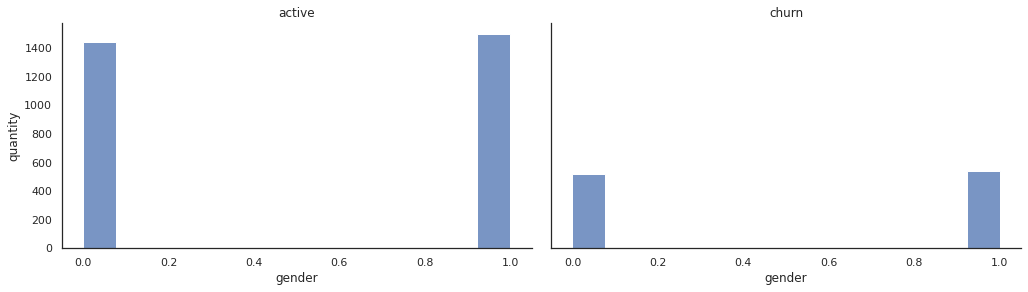

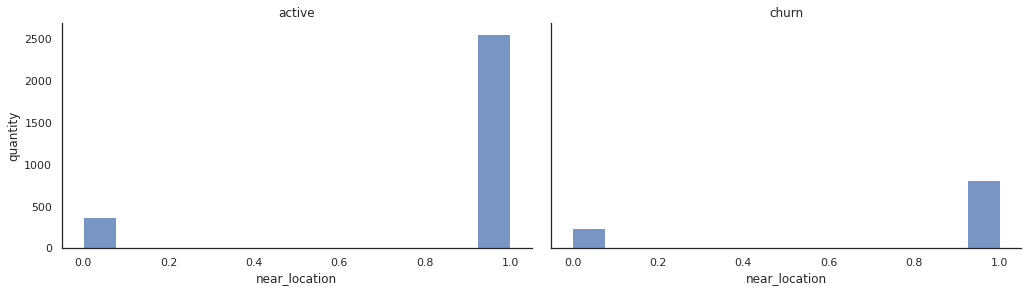

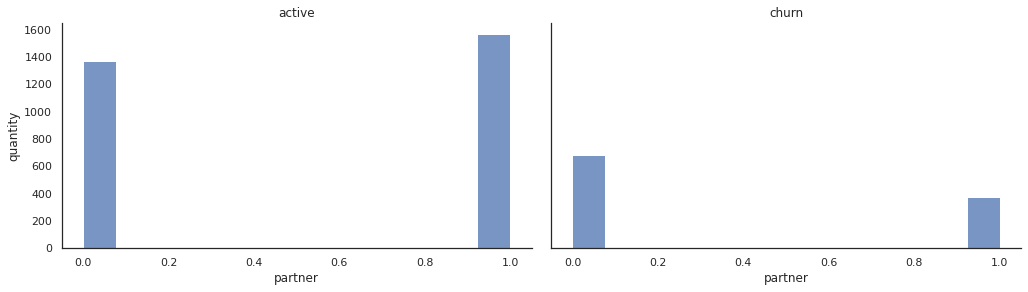

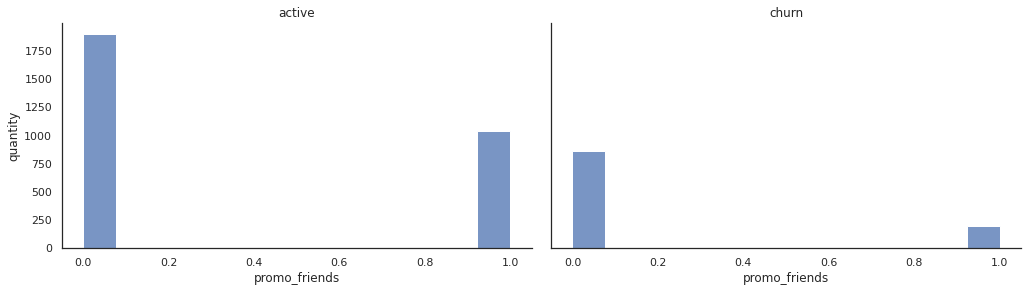

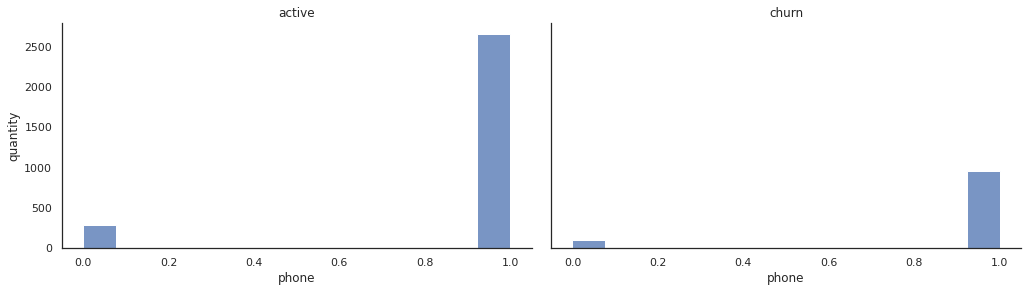

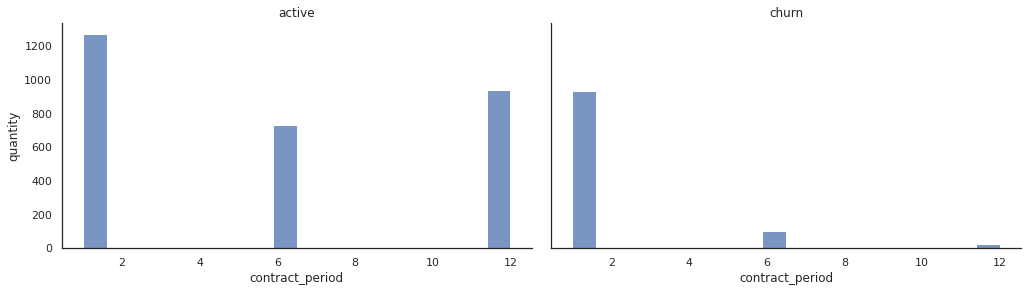

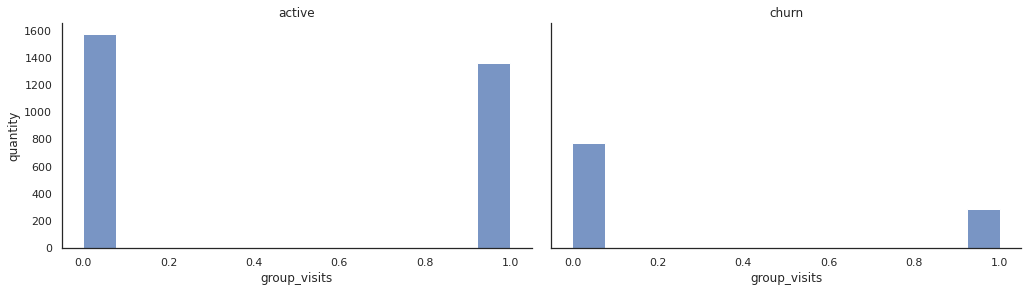

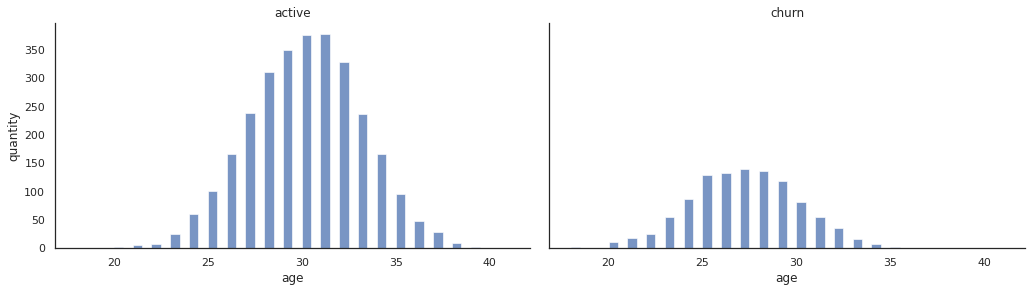

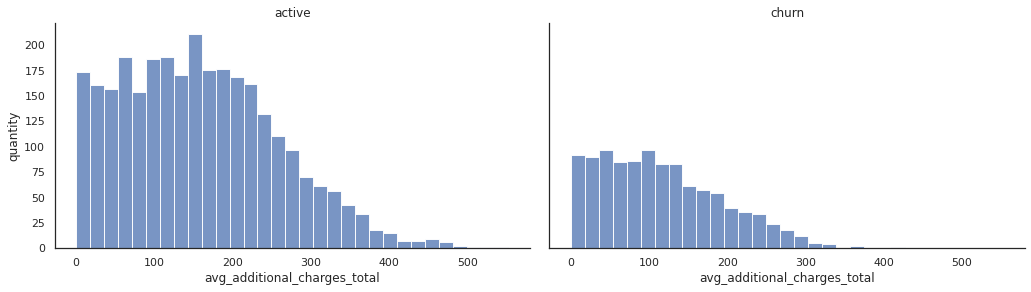

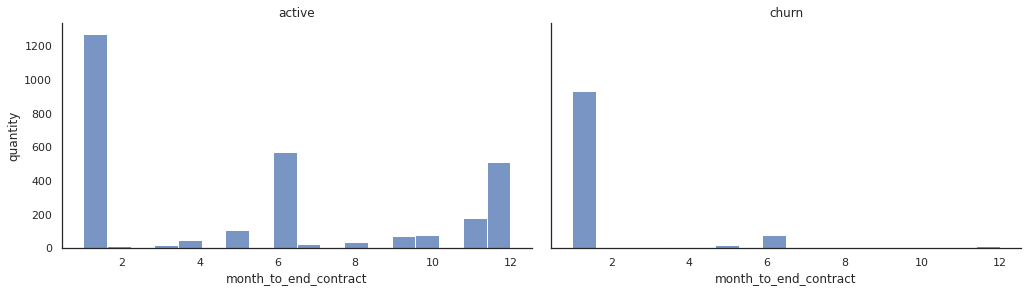

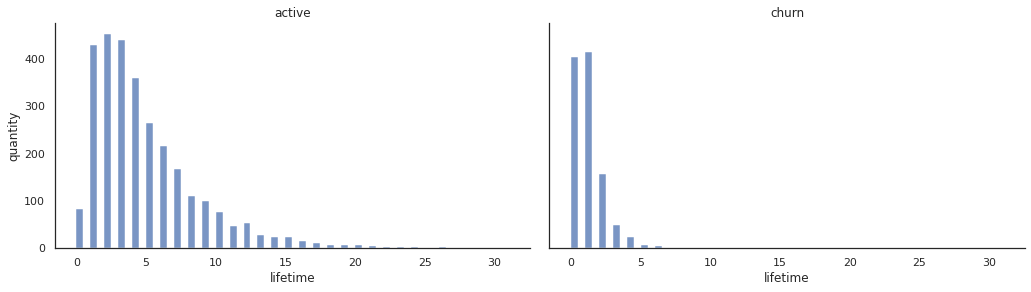

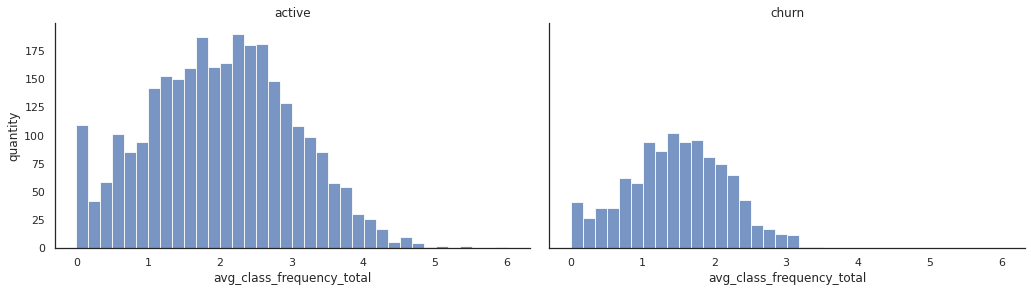

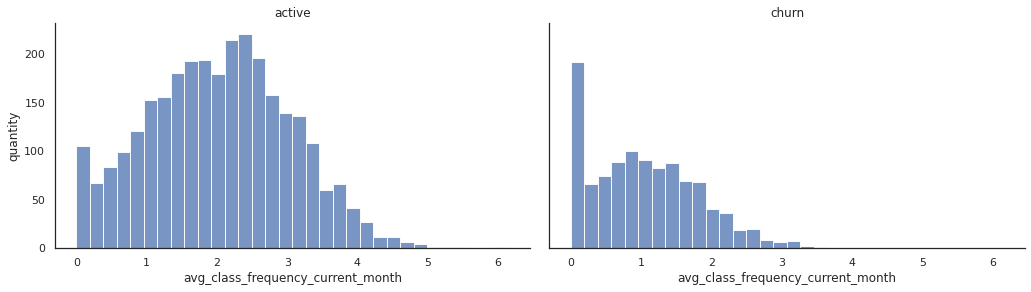

In [264]:
X=df.drop(columns='churn')
df_graph=df.copy()
df_graph['churn'] = df_graph['churn'].replace([1,0],['churn','active'])
for name in X.columns:
  g=sns.displot(data=df_graph, x=name, col="churn", palette="pastel")
  sns.set_style(style='white')
  g.fig.set_figwidth(15)
  g.fig.set_figheight(4)
  g.set_axis_labels(name, "quantity")
  g.set_titles("{col_name}");
  plt.show()

Уточнение характеристик клиентов из оттока:
* примерно поровну уходят как мужчины, так и женщины;
* фактор дальности не является основной причиной, видно что даже клиенты, находящиеся рядом с фитнес-центром тоже активно уходят;
* в основном приобретают месячный абонемент;
* большинство клиентов не посещают групповые занятия;
* основное распределение трат в диапазоне от 0 до 150 у.е., далее идет на снижение и совсем редко превышает 400 у.е.;
* у основной массы до конца абонемента остается 1 мес.;
* распределение продолжительности посещения в основном сосредоточено на отметке в 1-2 месяца, далее резкий спад.

###2.4. Построем матрицу корреляций и отобразите её

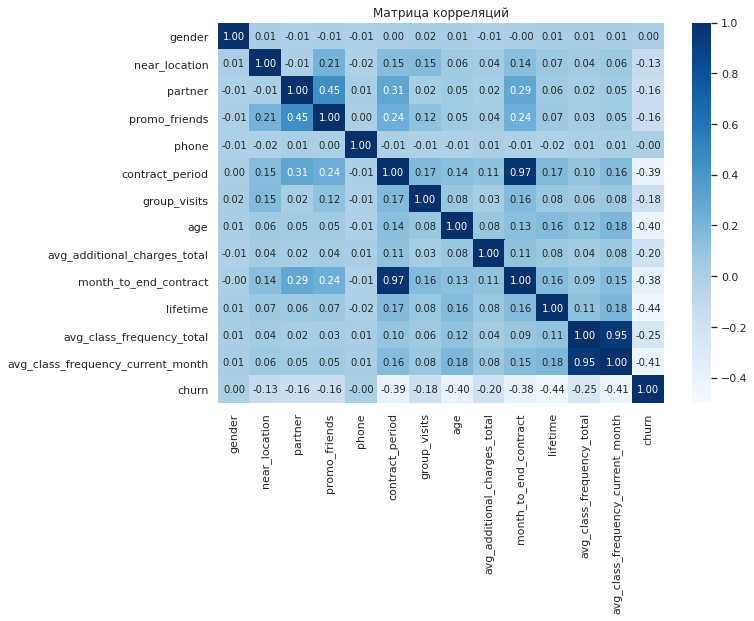

In [265]:
cm=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.2f',vmin=-0.5,annot_kws={"size": 10}, cmap="Blues")
plt.title('Матрица корреляций', fontsize = 12)
plt.show()

Сильно коррелирующими признаками являются:
* срок до окончания текущего действующего абонемента (в месяцах) и длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* средняя частота посещений в неделю за предыдущий месяц и суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

Фактически они показывают одно и тоже. Их необходимо удалить, чтобы они не мешали в обучении моделей.

##Шаг 3. Построем модель прогнозирования оттока клиентов

---



Построем модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

###3.1. Разобьем данные на обучающую и валидационную выборку функцией `train_test_split`()

У нас есть сильная корреляция между несколькими признаками, что говорит о мультиколлениарности.
Лучше всего избавляться от одного из таких признаками, чтобы наша модель работала объективно.

In [266]:
df_del_corr = df.copy()
df_del_corr = df_del_corr.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

Разделим наши данные на признаки (матрица X) и целевую переменную (y)
Применим для y атрибут `stratify`, что даст нам безопасность сохранения 20 % значений равного нужного нам количества классов в целевой переменной.


In [267]:
X=df_del_corr.drop('churn', axis=1)
y=df_del_corr['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Стандартизируем данные

In [268]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train) 
X_test_st =  scaler.transform(X_test)

###3.2. Обучим модель на train-выборке двумя способами:

* логистической регрессией

In [269]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

* случайным лесом

In [270]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

###3.3. Оценим метрики для обеих моделей на валидационной выборке

* Accuracy: доля правильных ответов
* Precision: точность (англ. precision)
* Recall: полнота
* F1_score: баланс между Precision and Recall
* ROC_AUC: доля оценки качества классификатора

Определим функцию для вывода метрик обучающих моделей

In [271]:
def print_all_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Рассчитаем вектор прогнозов с учётом порога, равного 0.4, и сравним с метриками, полученными при автоматическом расчёте классов

In [272]:
# выберем вручную уровень отсечения
threshold = 0.4
# на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i<threshold else 1 for i in lr_probabilities]
rf_custom_predictions = [0 if i<threshold else 1 for i in rf_probabilities]

In [273]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, 'Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, 'Метрики для модели случайного леса:')
print_all_metrics(y_test, lr_custom_predictions, lr_probabilities, 'Метрики для модели логистической регрессии с кастомным порогом:')
print_all_metrics(y_test, rf_custom_predictions, rf_probabilities, 'Метрики для модели случайного леса с кастомным порогом:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96
Метрики для модели логистической регрессии с кастомным порогом:
	Accuracy: 0.92
	Precision: 0.81
	Recall: 0.89
	F1: 0.85
	ROC_AUC: 0.97
Метрики для модели случайного леса с кастомным порогом:
	Accuracy: 0.91
	Precision: 0.80
	Recall: 0.88
	F1: 0.84
	ROC_AUC: 0.96


Дополнительно посмотим на ROC_AUC

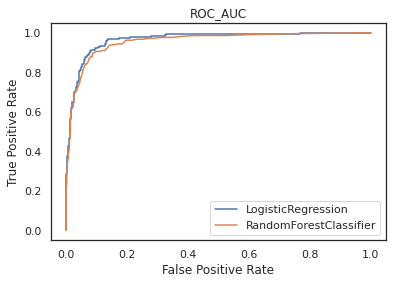

In [274]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, lr_probabilities)
plt.plot(fpr,tpr,label="LogisticRegression")
fpr, tpr, thresh = metrics.roc_curve(y_test, rf_probabilities)
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc=0)
plt.show()

Модель логистической регрессии с кастомным порогом обладает самыми высокими показателями метрик, а также по графику метрики ROC_AUC видим, что кривая алгоритма логистической регрессии «выгибается» к верхнему левому углу больше, то есть близка к 1, а значит является более точной.
В дальнейшем для прогнозирования можно использовать модель логистической регрессии с кастомным порогом.

##Шаг 4. Сделаем кластеризацию клиентов
---



###4.1. Стандартизируем данные

In [275]:
df_sc = scaler.fit_transform(df.drop(columns = ['churn'])) 

###4.2. Построим матрицу расстояний и нарисуем дендрограмму

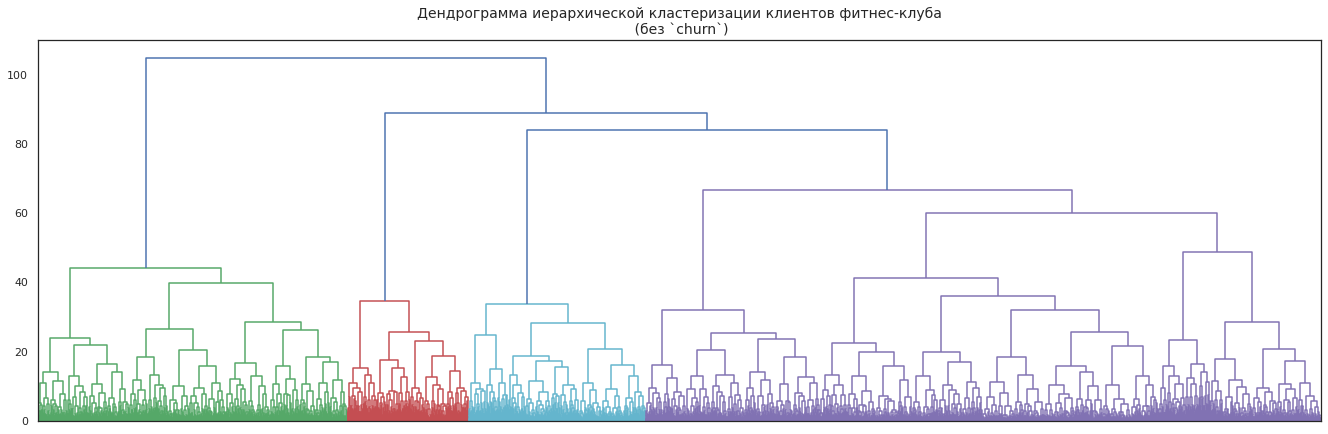

In [276]:
linked = linkage(df_sc, method = 'ward')
plt.figure(figsize=(23, 7))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес-клуба\n (без `churn`)', size=14)
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

Четвертый столбец очень большой попробуем добавить столбец `churn` и посмотрим на результат

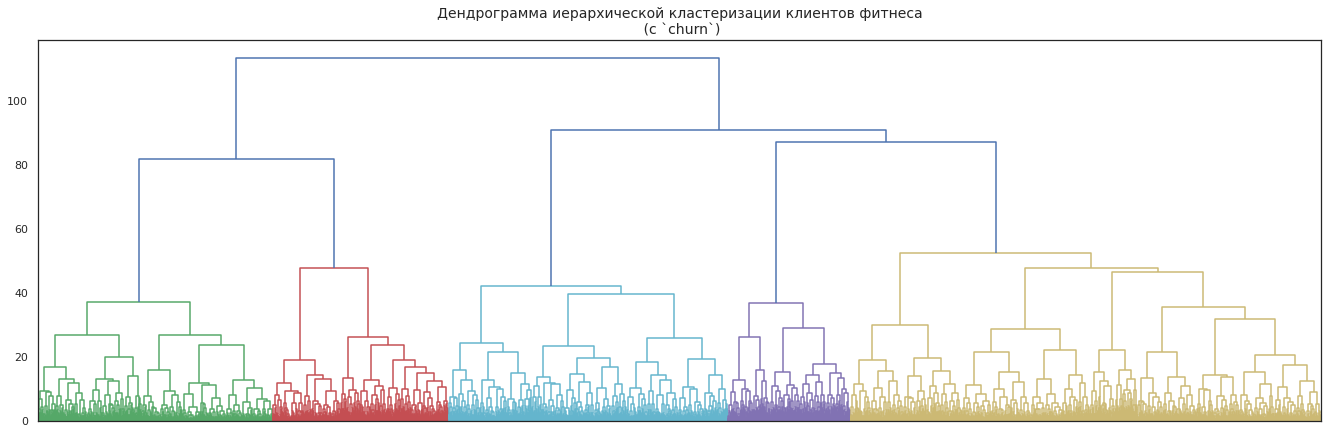

In [277]:
df_sc = scaler.fit_transform(df) 
linked = linkage(df_sc, method = 'ward')
plt.figure(figsize=(23, 7))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса\n (с `churn`)', size=14)
plt.show()

Число кластеров с дополнительным столбцом увеличилось до 5, что судя по дендрограмме более корректно.

###4.3. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

На основе дендрограммы зададим число кластеров равное 5, применим алгоритм к данным и сформируем вектор кластеров.

In [278]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_sc)

Сохраним метки кластера в поле `cluster_km` нашего датасета

In [279]:
df['cluster_km'] = labels

Оценим метрикой силуэта качество кластеризации

In [280]:
df_sc = scaler.fit_transform(df)
silhouette_score(df_sc, labels)

0.16253792995863284

Качество кластеризации не очень высокое.

###4.4. Посмотрим на средние значения признаков для кластеров

Произведем группировку данных по кластеру.

In [281]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.526178,0.506908,0.549592,0.474478,0.504175
near_location,0.869110,0.759830,0.843641,0.825986,0.938413
partner,0.471204,0.341126,0.368728,0.457077,0.768267
promo_friends,0.308901,0.179596,0.211202,0.262181,0.563674
phone,0.000000,0.996812,0.998833,1.000000,1.000000
contract_period,4.816754,1.566419,2.689615,2.751740,11.204593
group_visits,0.429319,0.257173,0.438740,0.382831,0.560543
age,29.340314,26.907545,29.982497,30.034803,29.878914
avg_additional_charges_total,144.517762,114.993470,161.128966,151.321785,162.665312
month_to_end_contract,4.502618,1.513284,2.476079,2.549884,10.257829


Почти все клиенты в оттоке попали в кластер № 1:
* мужчин и женщин в нем поровну;
* средний возраст - 27 лет;
* все признаки ниже чем в остальных кластерах, особенно ярковыраженные из них: длительность текущего действующего абонемента, факт посещения групповых занятий, суммарная выручка от других услуг фитнес-центра и  средняя частота посещений в неделю за предыдущий месяц.

В кластере № 0 из оттока 26 % клиентов. Отличительной особенностью этого кластера является полное отсутствие телефонов клиентов в базе.

Самые надежные кластеры № 2 и 3:
* самые возрастные клиенты - 30 лет;
* в кластере № 2 самая высокая средняя частота посещений.

###4.5. Построим распределения признаков для кластеров

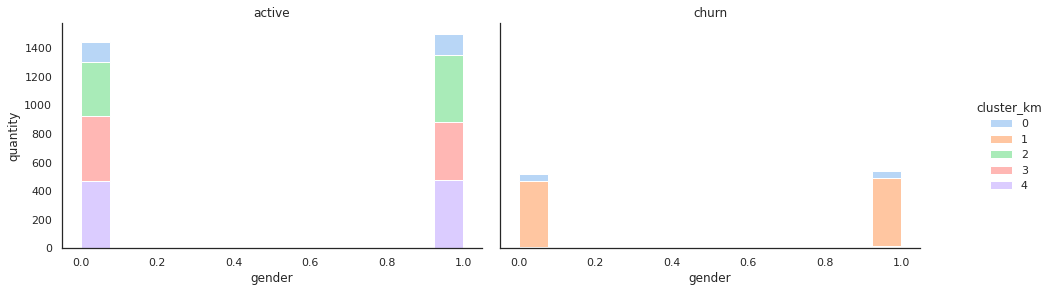

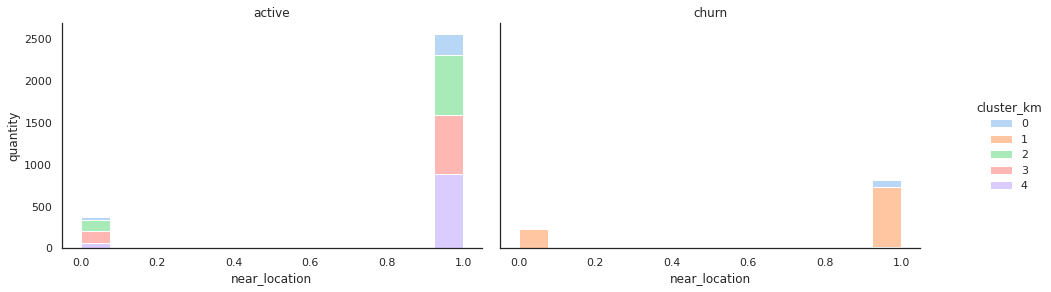

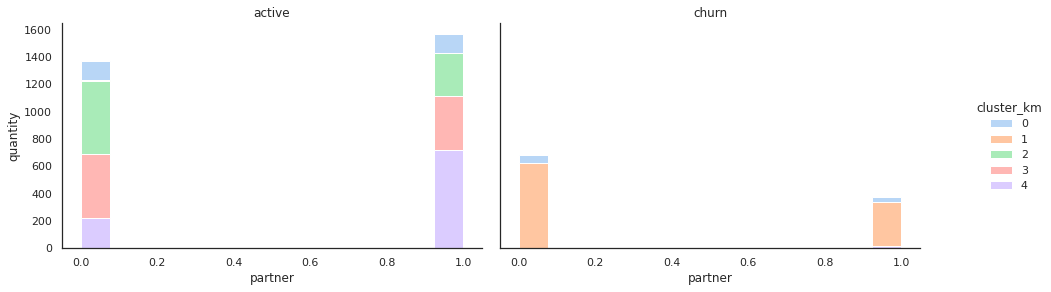

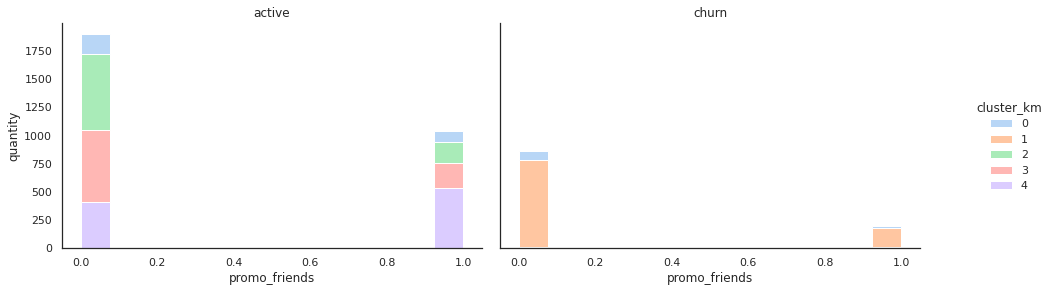

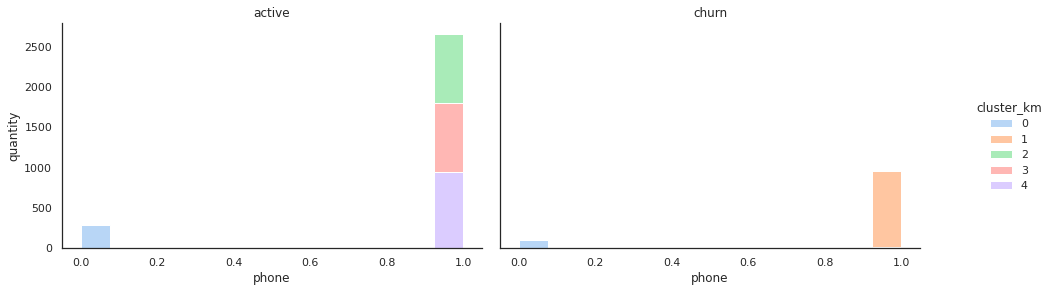

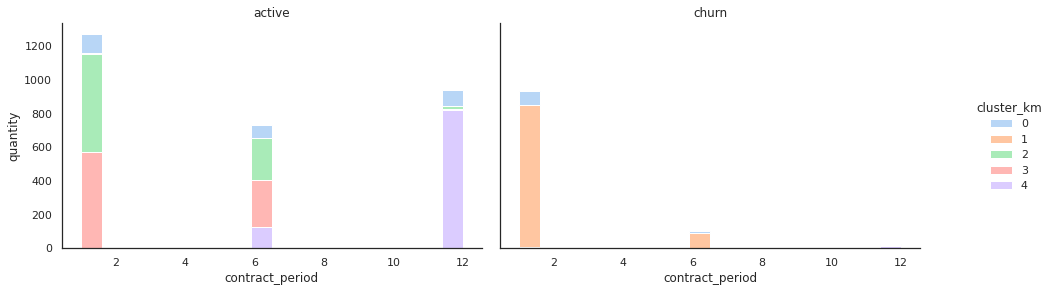

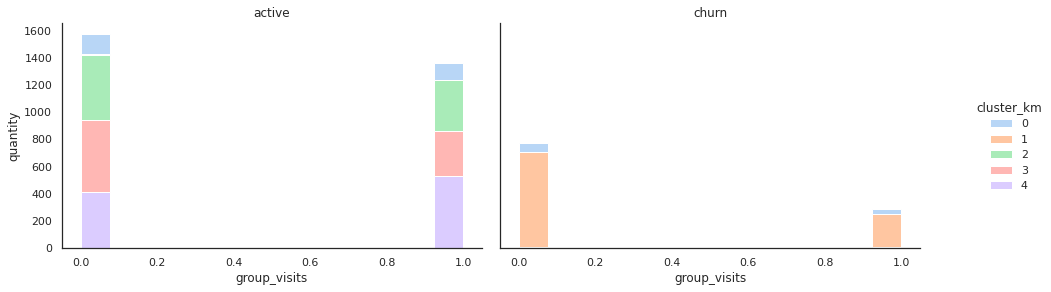

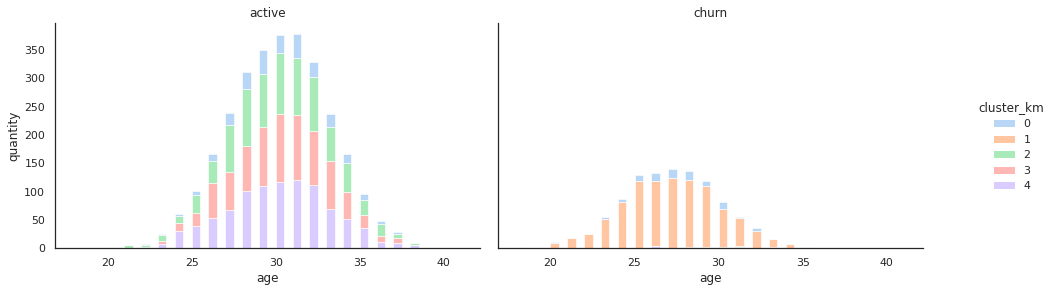

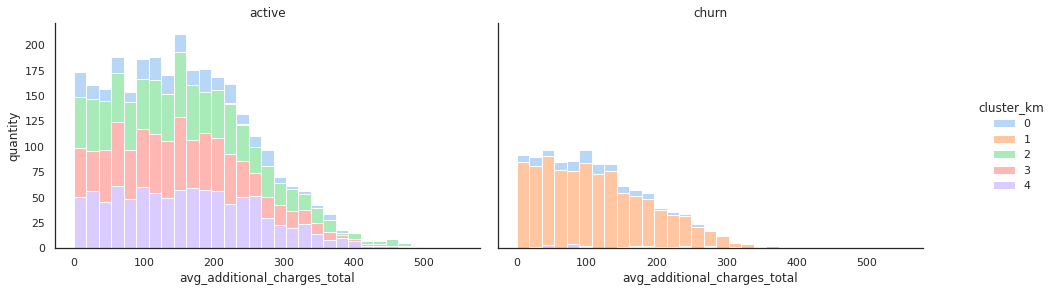

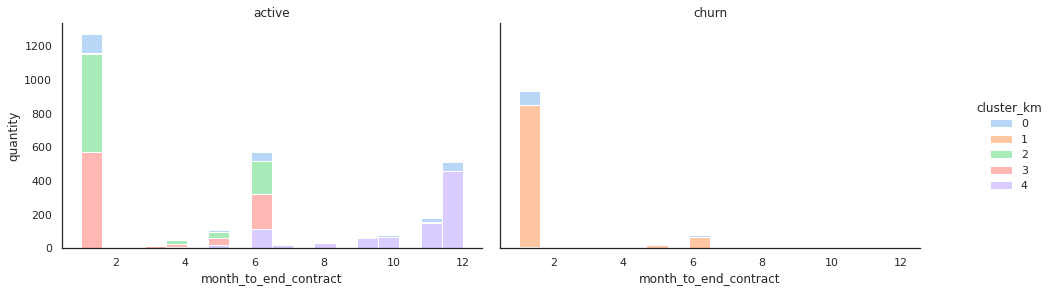

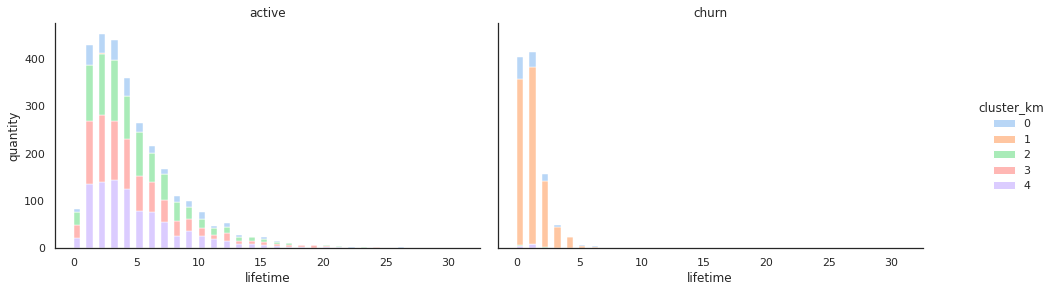

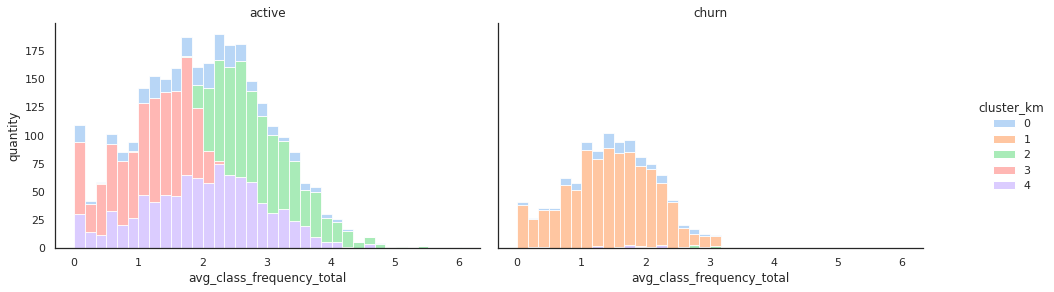

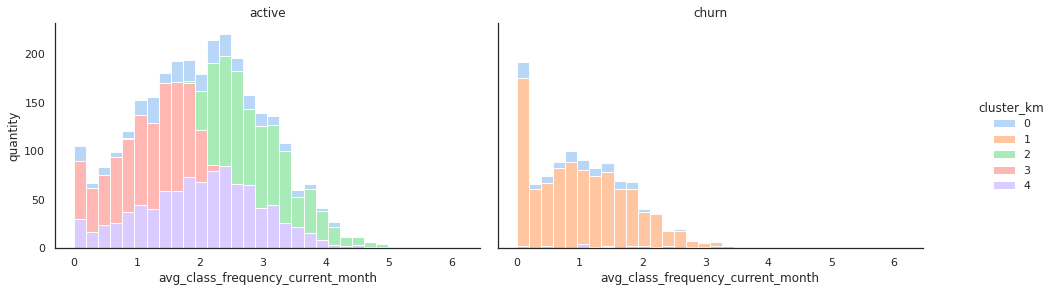

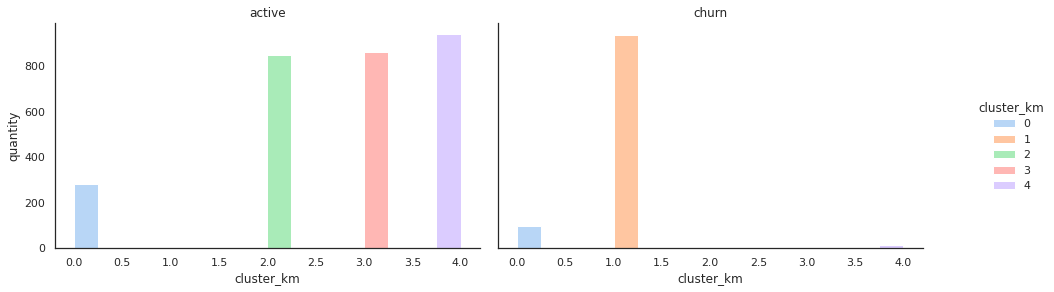

In [282]:
X=df.drop(columns='churn')
df_graph=df.copy()
df_graph['churn'] = df_graph['churn'].replace([1,0],['churn','active'])
for name in X.columns:
  g = sns.displot(df_graph, x=name, hue="cluster_km", palette="pastel", multiple="stack", col="churn")
  g.fig.set_figwidth(15)
  g.fig.set_figheight(4)
  g.set_axis_labels(name, "quantity")
  g.set_titles("{col_name}");
  plt.show()

Из ранее сделанных выводов по клиентам из оттока дополнительные инсайты следующие:
* порядка 75 % всех клиентов живут или работают рядом с фитнес-центром;
* половина клиентов не являются сотрудниками компании-партнера;
* 25 % клиентов пришли по акции "приведи друга";
* в основном все клиенты заключают контракт на минимальный срок;
* треть клиентов не посещают групповые занятия;
* гистограмма возраста имеет распределение нормального вида, со смещением влево, т.е. в более молодежную сторону;
* гистограмма дополнительных трат имеет отрицательное биномиальное распределение и в 2 раза ниже показателей по действующим клиентам;
* "срок жизни" клиентов до 5 месяцев, но в большинстве случаев они ходят в клуб 1-2 месяца;
* посещения 1-1,5 раза в неделю, в посдедний месяц снижаются до 0;
* самый "плохой" кластер в тоже время один из самых больших.

###4.6. Посчитаем долю оттока по кластерам

In [283]:
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.261780
1,0.997875
2,0.007001
3,0.001160
4,0.015658


Как уже было отмечено ранее, кластер № 1 состоит из клиентов в оттоке, а клиенты из кластеров № 2 и 3 являются наиболее лояльными.

##Шаг 5. Выводы
---



В работе были проведены исследовательский анализ данных, построены две модели прогнозирования оттока клиентов и произведена кластеризация клиентов для определения поведенческих групп клиентов и отличительных признаков клиентов из оттока.

В исследовательском анализе данных мы отметили, что на первый взгляд факторами оттока являются:
* приобретение абонемента на месячный срок;
* большинство клиентов не посещают групповые занятия;
* основное распределение трат в диапазоне от 0 до 150 у.е., далее идет на снижение и совсем редко превышает 400 у.е.;
* у основной массы до конца абонемента остается 1 мес.;
* распределение продолжительности посещения в основном сосредоточено на отметке в 1-2 месяца, далее резкий спад;
* отсутствие специальных льготных условий обслуживания: компания-партнер или акция "приведи друга".


На основе данных мы обучили две модели по алгоритмам логистической регрессии и случайного леса. Модель логистической регрессии с кастомным порогом на валидационной выборке выдала наилучшие метрики, в дальнейшем для прогнозирования оттока клиентов можно применять именно ее.


Также все клиенты были поделены на кластеры с помощью алгоритмов агломеративной иерархической кластеризации и K-Means, дополнительно мы отметили, что:
* распределение дополнительных трат в 2 раза ниже показателей по лояльным клиентам;
* "срок жизни" клиентов до 5 месяцев, но в большинстве случаев они ходят в клуб 1-2 месяца;
* посещения 1-1,5 раза в неделю, в последний месяц снижаются до 0;
* мужчин и женщин поровну;
* средний возраст - до 27 лет.

Рекомендуемые меры по удержанию клиентов:
* предложение к приобретению новым клиентам абонементы на срок от 6 месяцев;
* проведение промо-акций по групповым занятиям;
* анализ и внедрение товаров и услуг с более высоким спросом, а возможно и пересмотр ценовой политики на доп. товары и услуги;
* развитие спецпрограмм для новых клиентов.